In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

notebook_path = os.getcwd()
weights_file_path = f"{notebook_path}/c01_training_and_testing_weights.npy"

In [275]:
# Datasets path
# usa-housing_data
csv_train_path = f"{notebook_path}/usa-housing_data/usa-housing-train-preprocessed.csv"
csv_test_path = f"{notebook_path}/usa-housing_data/usa-housing-test-preprocessed.csv"

# simple_one_feature
# csv_train_path = (
#     f"{notebook_path}/test_data/simple_one_feature_housing-train-preprocessed.csv"
# )
# csv_test_path = (
#     f"{notebook_path}/test_data/simple_one_feature_housing-test-preprocessed.csv"
# )

In [276]:
def load_csv_as_augmented(csv_path):
    assert os.path.exists(csv_path), "File not exists, " + csv_path
    df = pd.read_csv(csv_path)
    print(df.columns)
    d = np.array(df)[:, 1:]
    x = d[:, :-1]
    x_aug = np.hstack((np.ones((x.shape[0], 1)), x))
    y = d[:, -1]
    print(f"x_aug.shape: {x_aug.shape}, y.shape: {y.shape}")
    return x_aug, y

In [277]:
def multiple_linear_regression(x, w):
    #y_hat = 0
    # for xi,wi in zip(x.T,w):
    #     y_hat+=xi*wi
    y_hat = x @ w
    return y_hat

In [278]:
def fn_mae(y_hat, y):
    return np.mean(np.abs(y_hat - y))


def fn_mse(y_hat, y):
    # return np.mean((y_hat - y) ** 2)

    # # 1
    # return 1 / len(y.flatten()) * np.linalg.norm(y_hat-y)**2

    # 2
    return 1 / len(y.flatten()) * ((y_hat - y).T @ (y_hat - y))


def fn_rmse(y_hat, y):
    return np.sqrt(fn_mse(y_hat, y))


def fn_r2(y_hat, y):
    r2 = 1 - np.sum((y_hat - y) ** 2) / np.sum((y.mean() - y) ** 2)
    return r2

In [279]:
def use_grad_mse(x, y, y_hat, w, eta):
    # # Not good
    # # for i in range(w.shape[0]):
    # #     # print(i)
    # #     g = 2 * np.mean(x[:, i] * (y_hat - y))
    # #     w[i] -= eta*g

    # # Better
    # grads = []
    # for xi in x.T:
    #     grads.append(2 * np.mean(xi * (y_hat - y)))
    # grads = np.array(grads)
    # w -= eta * grads

    w = w - eta * (2 / len(y.flatten()) * (x.T @ (y_hat - y)))

    return w

In [280]:
def gradient_decent(x, y, eta, epochs):
    e_mae_list = []
    e_mse_list = []
    w = np.random.random(x.shape[1])
    for epoch in range(epochs):
        y_hat = multiple_linear_regression(x, w)

        e_mae = fn_mae(y_hat, y)
        e_mae_list.append(e_mae)

        e_mse = fn_mse(y_hat, y)
        e_mse_list.append(e_mse)

        if epoch % 100 == 0 or epoch < 10 or epoch > epochs - 10:
            print(f"epoch {epoch},\tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f},\tw:{w}")

        # loss function MSE
        w = use_grad_mse(x, y, y_hat, w, eta)
    y_hat = multiple_linear_regression(x, w)
    e_mae = fn_mae(y_hat, y)
    e_mae_list.append(e_mae)

    e_mse = fn_mse(y_hat, y)
    e_mse_list.append(e_mse)

    print(f"Final    \tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f},\tw:{w}")
    info = {
        "weights": w,  # Not necessary
        "last_e_mae": e_mae,
        "e_mae_list": e_mae_list,
        "last_e_mse": e_mse,
        "e_mse_list": e_mse_list,
    }
    return w, info

In [281]:
# load train data
print("train: ", end="\t")
x_aug_train, y_train = load_csv_as_augmented(csv_train_path)

train: 	Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')
x_aug.shape: (3500, 6), y.shape: (3500,)


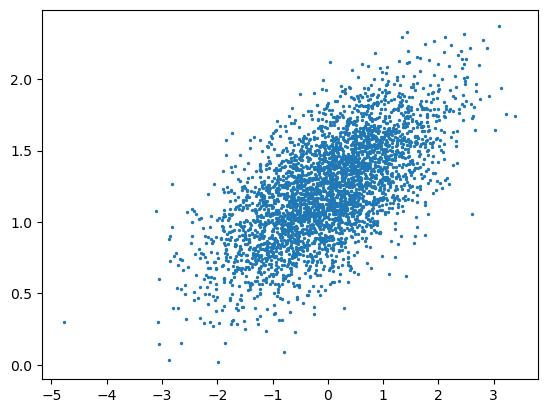

In [282]:
# Visualize
# plt.scatter(x_aug_train[:,0],y_train)
plt.scatter(x_aug_train[:, 1], y_train, s=2)
# plt.scatter(x_aug_train[:,2],y_train)
# ...

In [283]:
# For test
w = np.random.random(x_aug_train.shape[1])
y_hat_train_no_trained = multiple_linear_regression(x_aug_train, w)
print(f"y_hat_train_no_trained.shape: {y_hat_train_no_trained.shape}")
print(f"MAE: {fn_mae(y_hat_train_no_trained,y_train):.4f}")
print(f"MSE: {fn_mse(y_hat_train_no_trained,y_train):.4f}")

y_hat_train_no_trained.shape: (3500,)
MAE: 1.0480
MSE: 1.6331


In [284]:
# Training
epochs = 1000
eta = 0.005

weights, info = gradient_decent(x_aug_train, y_train, eta, epochs)
print(f"weights: {weights}")
print(f"Error MAE on train: {info["last_e_mae"]:.4f}")
print(f"Error MSE on train: {info["last_e_mse"]:.4f}")

# Save weights
np.save(weights_file_path, weights)
print(f"Weights saved in: {"c01_training_and_testing_weights.npy"} ")
# print(f"Weights saved in:{weights_file_path}")

epoch 0,	E_MAE:1.3027,	E_MSE:2.4944,	w:[0.63866492 0.81867631 0.07835055 0.82820991 0.79893548 0.47173331]
epoch 1,	E_MAE:1.2854,	E_MSE:2.4293,	w:[0.64462941 0.81254391 0.07917211 0.8173604  0.78767164 0.46866233]
epoch 2,	E_MAE:1.2683,	E_MSE:2.3659,	w:[0.65053386 0.80647629 0.07998558 0.80667284 0.77657064 0.46562023]
epoch 3,	E_MAE:1.2515,	E_MSE:2.3043,	w:[0.65637888 0.80047275 0.08079106 0.79614482 0.76563011 0.46260676]
epoch 4,	E_MAE:1.2349,	E_MSE:2.2442,	w:[0.66216506 0.79453261 0.08158862 0.78577401 0.7548477  0.45962166]
epoch 5,	E_MAE:1.2185,	E_MSE:2.1858,	w:[0.667893   0.78865519 0.08237835 0.77555806 0.74422111 0.45666467]
epoch 6,	E_MAE:1.2023,	E_MSE:2.1290,	w:[0.67356328 0.7828398  0.08316032 0.7654947  0.73374808 0.45373552]
epoch 7,	E_MAE:1.1864,	E_MSE:2.0737,	w:[0.67917648 0.77708579 0.08393461 0.75558167 0.72342635 0.45083396]
epoch 8,	E_MAE:1.1707,	E_MSE:2.0199,	w:[0.68473318 0.77139249 0.08470131 0.74581674 0.71325374 0.44795975]
epoch 9,	E_MAE:1.1552,	E_MSE:1.9675,	

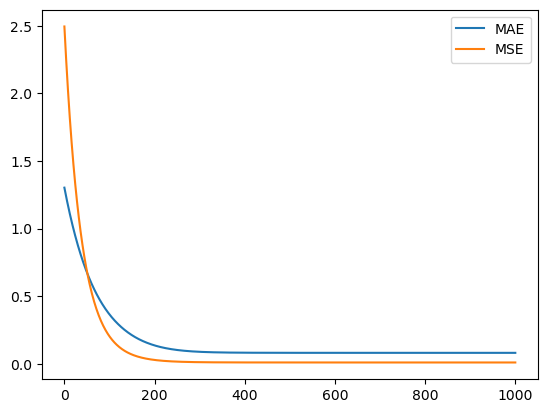

In [285]:
# Plot learning curve
plt.plot(info["e_mae_list"], label="MAE")
plt.plot(info["e_mse_list"], label="MSE")
plt.legend()

In [286]:
# load test data
print("\ntest: ", end="\t")
x_aug_test, y_test = load_csv_as_augmented(csv_test_path)


test: 	Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')
x_aug.shape: (1500, 6), y.shape: (1500,)


In [287]:
# Load weights
weights_loaded = np.load(weights_file_path)
print(f"weights_loaded:\t{weights_loaded}")

weights_loaded:	[1.23125317 0.23047377 0.16414572 0.12031493 0.00311864 0.15103929]


In [288]:
# Testing
y_hat_train = multiple_linear_regression(x_aug_train, weights_loaded)
print(f"Error MAE on train: \t{fn_mae(y_hat_train,y_train):.4f}")
print(f"Error MSE on train: \t{fn_mse(y_hat_train,y_train):.4f}")
print(f"Error RMSE on train: \t{fn_rmse(y_hat_train,y_train):.4f}")
print(f"Error R2 on train: \t{fn_r2(y_hat_train,y_train):.4f}")
print()
y_hat_test = multiple_linear_regression(x_aug_test, weights_loaded)
print(f"Error MAE on test: \t{fn_mae(y_hat_test,y_test):.4f}")
print(f"Error MSE on test: \t{fn_mse(y_hat_test,y_test):.4f}")
print(f"Error RMSE on test: \t{fn_rmse(y_hat_test,y_test):.4f}")
print(f"Error R2 on test: \t{fn_r2(y_hat_test,y_test):.4f}")

Error MAE on train: 	0.0815
Error MSE on train: 	0.0103
Error RMSE on train: 	0.1014
Error R2 on train: 	0.9193

Error MAE on test: 	0.0811
Error MSE on test: 	0.0101
Error RMSE on test: 	0.1003
Error R2 on test: 	0.9147


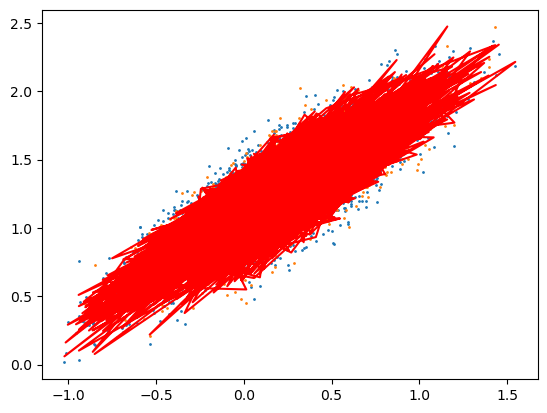

In [289]:
# Visualize using mean of data
# Best result on simple data
simple_x_train = np.mean(x_aug_train, axis=1)
simple_x_test = np.mean(x_aug_test, axis=1)
plt.scatter(simple_x_train, y_train, s=1)
plt.scatter(simple_x_test, y_test, s=1)

x_aug_total = np.vstack((x_aug_train, x_aug_test))
simple_x_total = np.mean(x_aug_total, axis=1)
y_hat_total = multiple_linear_regression(x_aug_total, weights_loaded)

plt.plot(simple_x_total, y_hat_total, c="red")